# 광진구 빅데이터 분석 전처리, 클러스터링 및 시각화

## 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 분석 /merged_df_ver2 (1).csv')

In [ ]:
df.head(2)

,표준버스정류장ID,출근시간대총승객수,낮시간대총승객수,퇴근시간대총승객수,밤시간대총승객수,일일총승객수,경도,버스정류장ARS번호,위도,행정동,...,30대 생활인구 수,40대 생활인구 수,50대 생활인구 수,60대 생활인구 수,65세 이상 생활인구 수,낮시간대 생활인구,퇴근시간 생활인구,밤시간대 생활인구,출근시간 생활인구,환승가능노선수
0,101000252,5930,8336,2555,878,17699,37.558316,5118,127.087676,중곡2동,...,6.009439e+07,4.905131e+07,5.034212e+07,6.745259e+07,4.753986e+07,9.197688e+07,5.162164e+07,1.254655e+08,5.482838e+07,3.0
1,104000003,7999,14441,7839,3198,33477,37.556099,5003,127.082473,중곡2동,...,6.009439e+07,4.905131e+07,5.034212e+07,6.745259e+07,4.753986e+07,9.197688e+07,5.162164e+07,1.254655e+08,5.482838e+07,6.0


In [ ]:
df.columns

Index(['표준버스정류장ID', '출근시간대총승객수', '낮시간대총승객수', '퇴근시간대총승객수', '밤시간대총승객수', '일일총승객수',
       '경도', '버스정류장ARS번호', '위도', '행정동', '면적', '세대', '0~10', '11~20', '21~30',
       '31~40', '41~50', '51~60', '61~70', '70이상', '대규모공연장', '대규모점포', '사업체수',
       '종사자수', '평균종사자', '사업체밀도', '종사자밀도(A) (명/㎢)', '인구밀도(B)',
       '종사자밀도비(A/B*100)', '총생활인구수', '10대 생활인구 수', '20대 생활인구 수', '30대 생활인구 수',
       '40대 생활인구 수', '50대 생활인구 수', '60대 생활인구 수', '65세 이상 생활인구 수', '낮시간대 생활인구',
       '퇴근시간 생활인구', '밤시간대 생활인구', '출근시간 생활인구', '환승가능노선수'],
      dtype='object')



> 전처리 고민

*   **행정동 기준으로 수집한 데이터(31개)는 범주형으로 봐야할지, 수치형으로 봐야할지**
    - 범주형으로 간주할 경우 범주 간의 순서나 거리 정보 손실
    - 원핫 인코딩이나 더미 변수로 변환하면 차원의 저주 문제 발생

*   pca 
    - 범주형 변수 사용하려면 더미 변수로 변환해야함
    - but 더미변수 변환하면 차원이 높아지므로 pca목적과는 조금 모순... 
* T-SNE 
    - 마찬가지로 더미변수 변환하면 차원이 너무 높아짐






In [ ]:
data = df.drop(['표준버스정류장ID', '경도', '버스정류장ARS번호', '위도', '행정동','평균종사자','사업체수',
       '종사자수','종사자밀도비(A/B*100)','총생활인구수','65세 이상 생활인구 수'],axis=1)

### minmax

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_ = MinMaxScaler()
scaler_.fit(data)
data_scaled = scaler_.transform(data)

In [ ]:
colnames = data.columns 

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=colnames)

## 클러스터링

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

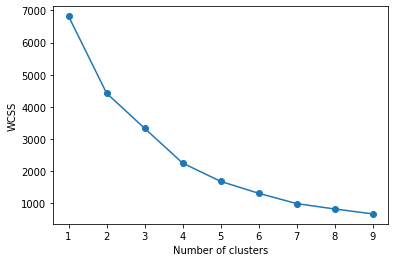

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, centers=4, random_state=42)

wcss = []  # within-cluster sum of squares

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### 엘보우 기법을 사용하여 최적의 k 찾기
- 클러스터 개수를 늘렸을 때 SSE값이 많이 감소하지 않는 구간이 최적의 K
- 위 그래프에서 8로 확인되어 8개의 군집으로 클러스터링

In [ ]:
# KMeans 알고리즘으로 클러스터링 수행
kmeans = KMeans(n_clusters=8, random_state=0).fit(data_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### pca는 그냥 참고만 하세요...!!!!!
### 이 부분은 무시하셔도 됩니다 

In [ ]:
# PC로 2차원으로 축소
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(data_scaled)

<ipython-input-27-10a1336d2dc0>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=plt.cm.get_cmap('viridis', 8))


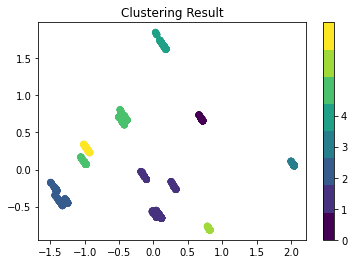

In [ ]:
# 클러스터링 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=plt.cm.get_cmap('viridis', 8))
plt.colorbar(ticks=range(5))
plt.title('Clustering Result')
plt.show()

 군집 시각화해서 보고싶어서 단순하게 2차원으로 축소해서 시각화 해보았는데 그냥 참고만 하시고 안보셔도 됩니다!!
(pca해서 생성된 변수들이 기존의 변수를 얼마나 설명하고 있는지 봐야하는데 안봤습니다 ㅎ)

In [ ]:
df['군집소속'] = kmeans.labels_

## 군집별로 평균값 확인

In [ ]:
df.groupby('군집소속').mean()

,표준버스정류장ID,출근시간대총승객수,낮시간대총승객수,퇴근시간대총승객수,밤시간대총승객수,일일총승객수,경도,버스정류장ARS번호,위도,면적,...,30대 생활인구 수,40대 생활인구 수,50대 생활인구 수,60대 생활인구 수,65세 이상 생활인구 수,낮시간대 생활인구,퇴근시간 생활인구,밤시간대 생활인구,출근시간 생활인구,환승가능노선수
군집소속,,,,,,,,,,,,,,,,,,,,,
0,1.045212e+08,1372.596491,3982.890351,3282.864035,814.596491,9452.947368,37.538319,5451.526316,127.093032,1.020000,...,8.271681e+07,9.271712e+07,8.386896e+07,1.032622e+08,7.008388e+07,1.839249e+08,9.506192e+07,1.715574e+08,8.591521e+07,0.736842
1,1.043204e+08,3119.210452,4894.000000,2622.597458,979.481638,11615.289548,37.539927,5335.898305,127.080260,1.372203,...,6.349911e+07,6.347151e+07,5.977931e+07,8.437135e+07,5.870890e+07,1.224605e+08,6.791930e+07,1.383541e+08,6.604562e+07,2.491525
2,1.040979e+08,2407.681159,3965.929348,1915.438406,938.943841,9227.992754,37.563010,5204.434783,127.080987,0.683478,...,5.001095e+07,4.140282e+07,4.251718e+07,6.048522e+07,4.242183e+07,8.646925e+07,4.662136e+07,9.349977e+07,4.465280e+07,2.673913
3,1.047241e+08,998.918994,1670.396648,736.731844,241.201117,3647.248603,37.545513,5555.346369,127.102951,2.390000,...,7.411231e+07,1.230910e+08,9.557645e+07,1.075420e+08,7.551872e+07,2.038986e+08,1.044715e+08,2.202890e+08,1.096907e+08,0.329609
4,1.042029e+08,2526.873239,5863.314554,4145.976526,1795.793427,14331.957746,37.543850,5314.943662,127.070366,1.100000,...,1.122027e+08,6.923524e+07,5.964737e+07,7.584581e+07,5.279752e+07,2.211246e+08,1.238572e+08,2.061280e+08,1.012780e+08,5.028169
5,1.042715e+08,3397.371032,5471.515873,2651.319444,919.571429,12439.777778,37.546046,5334.476190,127.084108,0.577857,...,7.279505e+07,6.197309e+07,5.874612e+07,7.764471e+07,5.386226e+07,1.168734e+08,6.457527e+07,1.473653e+08,6.689486e+07,2.452381
6,1.047364e+08,899.515152,1344.797980,569.734848,152.378788,2966.426768,37.559273,5522.848485,127.090533,2.320000,...,6.706345e+07,6.247183e+07,7.290686e+07,1.151736e+08,8.130950e+07,1.342702e+08,7.394204e+07,1.603035e+08,7.499087e+07,0.363636
7,1.040002e+08,2732.223485,4409.859848,2080.113636,943.522727,10165.719697,37.553513,5233.954545,127.073847,0.730000,...,6.652893e+07,4.604841e+07,4.106982e+07,5.646794e+07,3.961724e+07,1.168754e+08,5.956506e+07,1.109856e+08,5.625380e+07,3.000000


In [ ]:
group0 = df[df['군집소속']==0]
group1 = df[df['군집소속']==1]
group2 = df[df['군집소속']==2]
group3 = df[df['군집소속']==3]
group4 = df[df['군집소속']==4]
group5 = df[df['군집소속']==5]
group6 = df[df['군집소속']==6]
group7 = df[df['군집소속']==7]

In [ ]:
group_list = [group0,group1,group2,group3,group4,group5,group6,group7]

In [ ]:
df.groupby('행정동').count()

In [ ]:
def cnt(data):
    print(data['행정동'].value_counts())
    print('-------------')

for i in group_list:
    cnt(i)

구의3동    228
Name: 행정동, dtype: int64
-------------
구의2동    240
자양3동    192
자양2동    168
자양4동    108
Name: 행정동, dtype: int64
-------------
중곡3동    264
중곡1동    204
능동       84
Name: 행정동, dtype: int64
-------------
광장동    358
Name: 행정동, dtype: int64
-------------
화양동    213
Name: 행정동, dtype: int64
-------------
중곡2동    192
구의1동    156
자양1동    156
Name: 행정동, dtype: int64
-------------
중곡4동    396
Name: 행정동, dtype: int64
-------------
군자동    264
Name: 행정동, dtype: int64
-------------


## 지도 시각화

In [ ]:
!pip install folium
import folium
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 지도 기준 정보
# 위도
latitude = 37.545513
# 경도
longitude = 127.102951

In [ ]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=16, 
               width=750, 
               height=500
              )
m

In [ ]:
x = df['위도']
y = df['경도']

In [ ]:
for i in range(len(x)):
    folium.Marker([y[i], x[i]],
              ).add_to(m)

In [ ]:
m

## 결론

### 클러스터링 문제점
1. 클러스터링 결과 행정동을 기준으로 한 데이터가 많아서 다른 특성이 흐려지고 행정동끼리 군집이 형성됨 
2. 행정동 기준 변수를 최대한 제거하거나, 정류장을 기준으로한 새로운 변수 추가가 필요함


- 방법 1 : 행정동 기준 변수 제거
- 방법 2 : 행정동 기준으로 클러스터링하여 결과 본 다음 상위 몇 개의 동을 가지고 다시 클러스터링

